In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
! pip install --upgrade pip

Requirement already up-to-date: pip in /Users/brianlouie/anaconda3/lib/python3.6/site-packages (19.1.1)


In [3]:
! pip install nba_api

In [2]:
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.endpoints import playerdashboardbyshootingsplits

In [3]:
from nba_api.stats.static import teams
# get_teams returns a list of 30 dictionaries, each an NBA team.
nba_teams = teams.get_teams()

from nba_api.stats.static import players
# get_players returns a list of dictionaries, each representing a player.
nba_players = players.get_players()

thebeard = [player for player in nba_players
                   if player['full_name'] == 'James Harden'][0]
thebeard

{'id': 201935,
 'full_name': 'James Harden',
 'first_name': 'James',
 'last_name': 'Harden'}

In [4]:
Melo_frm_redhook = [player for player in nba_players
                    if player['full_name']== "Carmelo Anthony"][0]
Melo_frm_redhook

{'id': 2546,
 'full_name': 'Carmelo Anthony',
 'first_name': 'Carmelo',
 'last_name': 'Anthony'}

In [5]:
Melo_frm_redhook["id"]

2546

In [6]:
player_info = commonplayerinfo.CommonPlayerInfo(player_id = 2546)
player_info.get_data_frames()[0]

,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,...,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER
0,2546,Carmelo,Anthony,Carmelo Anthony,"Anthony, Carmelo",C. Anthony,1984-05-29T00:00:00,Syracuse,USA,Syracuse/USA,...,,carmelo_anthony,2003,2018,N,Y,Y,2003,1,3


In [19]:
career = playercareerstats.PlayerCareerStats(player_id='2546')
melo_career = career.get_data_frames()[0]
melo_career.columns
melo_career = melo_career.drop(['LEAGUE_ID'],axis= 1)
#Only league Melo has been in is the NBA, no need for league ID

In [20]:
avg_FG = melo_career.describe()['FG_PCT']
avg_FG

count    18.000000
mean      0.445889
std       0.023544
min       0.404000
25%       0.431500
50%       0.446500
75%       0.457250
max       0.492000
Name: FG_PCT, dtype: float64

In [21]:
melo_career.values

array([[2546, '2003-04', 1610612743, 'DEN', 20.0, 82, 82, 2994.0, 624,
        1465, 0.426, 69, 214, 0.322, 408, 525, 0.777, 183, 315, 498, 227,
        97, 41, 247, 225, 1725],
       [2546, '2004-05', 1610612743, 'DEN', 21.0, 75, 75, 2608.0, 530,
        1230, 0.431, 42, 158, 0.266, 456, 573, 0.796, 141, 285, 426, 194,
        68, 30, 224, 229, 1558],
       [2546, '2005-06', 1610612743, 'DEN', 22.0, 80, 80, 2941.0, 756,
        1572, 0.481, 37, 152, 0.243, 573, 709, 0.808, 122, 272, 394, 216,
        88, 42, 218, 229, 2122],
       [2546, '2006-07', 1610612743, 'DEN', 23.0, 65, 65, 2486.0, 691,
        1453, 0.476, 40, 149, 0.268, 459, 568, 0.808, 143, 248, 391, 249,
        77, 23, 234, 203, 1881],
       [2546, '2007-08', 1610612743, 'DEN', 24.0, 77, 77, 2806.0, 728,
        1481, 0.492, 58, 164, 0.354, 464, 590, 0.786, 178, 393, 571, 259,
        98, 39, 253, 253, 1978],
       [2546, '2008-09', 1610612743, 'DEN', 25.0, 66, 66, 2277.0, 535,
        1207, 0.443, 63, 170, 0.371, 37

In [22]:
melo_career.tail(6)

,PLAYER_ID,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
12,2546,2013-14,1610612752,NYK,30.0,77,77,2982.0,743,1643,...,0.848,145,477,622,242,95,51,198,224,2112
13,2546,2014-15,1610612752,NYK,31.0,40,40,1428.0,358,806,...,0.797,72,192,264,122,40,17,89,87,966
14,2546,2015-16,1610612752,NYK,32.0,72,72,2530.0,567,1307,...,0.829,98,458,556,299,62,38,176,180,1573
15,2546,2016-17,1610612752,NYK,33.0,74,74,2538.0,602,1389,...,0.833,62,376,438,213,60,34,153,198,1659
16,2546,2017-18,1610612760,OKC,34.0,78,78,2501.0,472,1168,...,0.767,67,386,453,103,47,49,99,197,1261
17,2546,2018-19,1610612745,HOU,34.0,10,2,294.0,49,121,...,0.682,9,45,54,5,4,7,8,32,134


Text(0.5,0,'Years in the NBA')

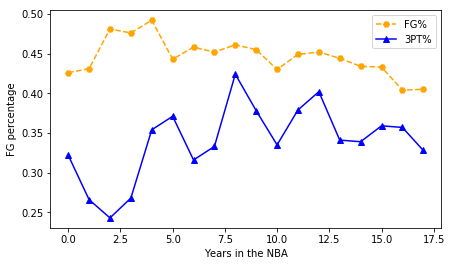

In [23]:
yrs_in = np.linspace(0,18,1)
plt.figure(figsize=(7,4))
plt.plot(melo_career['FG_PCT'], linestyle='dashed', color='orange', marker='H',label='FG%')
plt.plot(melo_career['FG3_PCT'], linestyle='solid', color='blue', marker='^',label="3PT%")

plt.legend()
plt.ylabel('FG percentage')
plt.xlabel('Years in the NBA')

In [24]:
from nba_api.stats.static import teams

nba_teams = teams.get_teams()
knicks = [team for team in nba_teams if team['abbreviation'] == 'NYK'][0]
knicks_id = knicks['id']

In [25]:
from nba_api.stats.endpoints import leaguegamefinder

# Query for games where the Knicks were playing
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=knicks_id)
# The first DataFrame of those returned is what we want.
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22018,1610612752,NYK,New York Knicks,0021801223,2019-04-10,NYK vs. DET,L,241,89,...,0.720,4.0,29.0,33.0,23,7.0,5.0,11.0,17.0,-26.0
1,22018,1610612752,NYK,New York Knicks,0021801213,2019-04-09,NYK @ CHI,W,240,96,...,0.615,11.0,50.0,61.0,17,0.0,10.0,9.0,16.0,10.0
2,22018,1610612752,NYK,New York Knicks,0021801204,2019-04-07,NYK vs. WAS,W,240,113,...,0.737,7.0,36.0,43.0,24,5.0,9.0,15.0,14.0,3.0
3,22018,1610612752,NYK,New York Knicks,0021801184,2019-04-05,NYK @ HOU,L,240,96,...,0.593,5.0,48.0,53.0,22,3.0,6.0,15.0,17.0,-24.0
4,22018,1610612752,NYK,New York Knicks,0021801166,2019-04-03,NYK @ ORL,L,241,100,...,0.857,8.0,31.0,39.0,21,10.0,5.0,12.0,18.0,-14.0


In [26]:
games.groupby(games.SEASON_ID.str[-4:])[['GAME_ID']].count().loc['2018':]

,GAME_ID
SEASON_ID,
2018,92


In [27]:
games['SEASON_ID'] = pd.to_numeric(games['SEASON_ID'])

In [28]:
games['WL'] = games['WL'].astype(str)

In [29]:
games.SEASON_ID.dtype

dtype('int64')

In [30]:
knicks_1819 = games[games.SEASON_ID == 22018]
knicks_1819.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22018,1610612752,NYK,New York Knicks,0021801223,2019-04-10,NYK vs. DET,L,241,89,...,0.720,4.0,29.0,33.0,23,7.0,5.0,11.0,17.0,-26.0
1,22018,1610612752,NYK,New York Knicks,0021801213,2019-04-09,NYK @ CHI,W,240,96,...,0.615,11.0,50.0,61.0,17,0.0,10.0,9.0,16.0,10.0
2,22018,1610612752,NYK,New York Knicks,0021801204,2019-04-07,NYK vs. WAS,W,240,113,...,0.737,7.0,36.0,43.0,24,5.0,9.0,15.0,14.0,3.0
3,22018,1610612752,NYK,New York Knicks,0021801184,2019-04-05,NYK @ HOU,L,240,96,...,0.593,5.0,48.0,53.0,22,3.0,6.0,15.0,17.0,-24.0
4,22018,1610612752,NYK,New York Knicks,0021801166,2019-04-03,NYK @ ORL,L,241,100,...,0.857,8.0,31.0,39.0,21,10.0,5.0,12.0,18.0,-14.0


In [38]:
knicks_1819['GAME_DATE'] = pd.to_datetime(knicks_1819['GAME_DATE'], errors = 'raise')
knicks_1819.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 91
Data columns (total 28 columns):
SEASON_ID            87 non-null int64
TEAM_ID              87 non-null int64
TEAM_ABBREVIATION    87 non-null object
TEAM_NAME            87 non-null object
GAME_ID              87 non-null object
GAME_DATE            87 non-null datetime64[ns]
MATCHUP              87 non-null object
WL                   87 non-null object
MIN                  87 non-null int64
PTS                  87 non-null int64
FGM                  87 non-null int64
FGA                  87 non-null int64
FG_PCT               87 non-null float64
FG3M                 87 non-null int64
FG3A                 87 non-null float64
FG3_PCT              87 non-null float64
FTM                  87 non-null int64
FTA                  87 non-null int64
FT_PCT               87 non-null float64
OREB                 87 non-null float64
DREB                 87 non-null float64
REB                  87 non-null float64
AST        

/Users/brianlouie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
import datetime
knicks_1819['Game_Dayname'] = knicks_1819['GAME_DATE'].dt.day_name()

/Users/brianlouie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [83]:
knicks_1819.groupby(['Game_Dayname']).mean()

,SEASON_ID,TEAM_ID,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
Game_Dayname,,,,,,,,,,,,,,,,,,,,,
Friday,22018.0,1.610613e+09,239.294118,105.764706,39.411765,88.352941,0.447176,9.411765,30.000000,0.312588,...,0.749529,9.176471,33.411765,42.588235,20.117647,8.294118,5.529412,12.352941,20.823529,-8.047059
Monday,22018.0,1.610613e+09,244.083333,106.583333,38.583333,90.250000,0.428583,9.416667,28.750000,0.324750,...,0.779500,12.416667,34.833333,47.250000,19.833333,6.333333,4.500000,12.916667,19.916667,-7.416667
Saturday,22018.0,1.610613e+09,238.000000,102.888889,37.777778,88.000000,0.428111,10.666667,30.111111,0.350444,...,0.692444,10.555556,35.111111,45.666667,20.888889,8.222222,4.111111,14.000000,21.777778,-7.822222
Sunday,22018.0,1.610613e+09,237.562500,103.750000,37.812500,86.062500,0.439688,9.812500,28.937500,0.336625,...,0.761375,10.875000,33.500000,44.375000,20.250000,6.062500,5.812500,13.937500,21.000000,-7.912500
Thursday,22018.0,1.610613e+09,234.428571,98.142857,36.285714,86.714286,0.418286,10.285714,28.714286,0.355857,...,0.733857,11.571429,33.428571,45.000000,19.142857,5.571429,5.428571,12.857143,21.000000,-10.514286
Tuesday,22018.0,1.610613e+09,236.200000,100.600000,36.900000,87.800000,0.422200,9.800000,28.300000,0.345700,...,0.773600,11.900000,35.400000,47.300000,18.300000,5.700000,4.900000,13.300000,21.100000,-7.300000
Wednesday,22018.0,1.610613e+09,240.000000,104.000000,37.312500,86.187500,0.433500,9.750000,28.250000,0.345625,...,0.790563,8.687500,32.625000,41.312500,19.750000,7.125000,5.875000,14.250000,21.125000,-12.000000


In [39]:
knicks_1819.WL.value_counts()

L    68
W    19
Name: WL, dtype: int64

In [42]:
knicks_1819[['AST','PTS','PLUS_MINUS','FG3M','TOV','STL']].sum()

AST           1725.0
PTS           9020.0
PLUS_MINUS    -761.4
FG3M           852.0
TOV           1165.0
STL            598.0
dtype: float64

In [43]:
corr = knicks_1819.corr

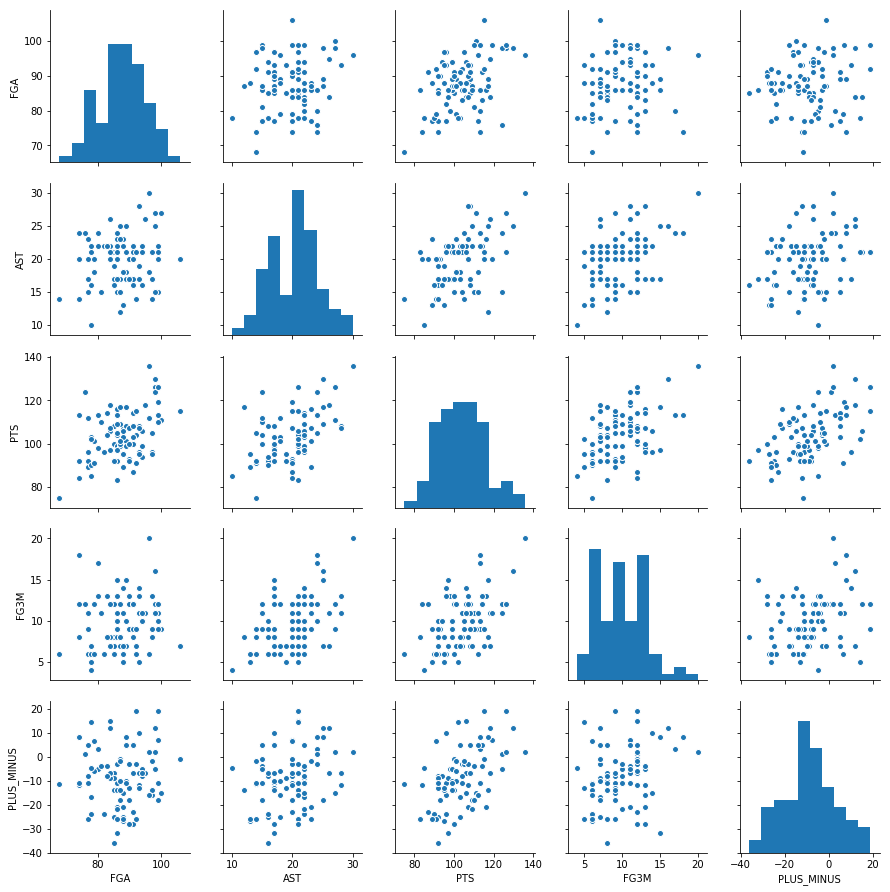

In [44]:
sns.pairplot(knicks_1819[['FGA','AST','PTS','FG3M','PLUS_MINUS']])

Text(0,0.5,"Plus Minus ('18-19)")

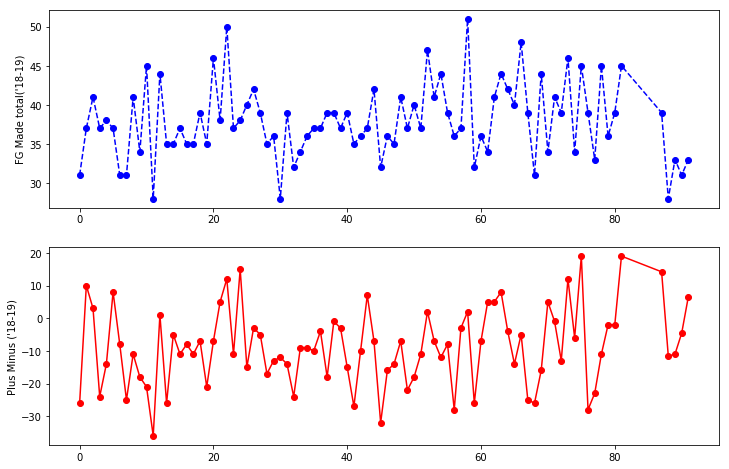

In [56]:

plt.figure(1, figsize=(12,8))
plt.subplot(211)
plt.plot(knicks_1819["FGM"],'bo',linestyle='dashed')
plt.ylabel("FG Made total('18-19)")

plt.subplot(212)
plt.plot(knicks_1819["PLUS_MINUS"], 'ro', linestyle='solid')
plt.ylabel("Plus Minus ('18-19)")

#Lots of really bad losses. No surprise